# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [99]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [100]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}&units=metric'
    response = requests.get(city_url)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | touros
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | yarmouth
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | quellon
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | ijuw
City not found. Skipping...


KeyboardInterrupt: 

In [2]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

NameError: name 'city_data' is not defined

In [7]:
# Display sample data
city_data_df.head

NameError: name 'city_data_df' is not defined

In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

NameError: name 'city_data_df' is not defined

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                    
0          libreville   0.3925    9.4537     29.01        79          20   
1             la cruz  23.9167 -106.9000     30.92        67          60   
2            tazovsky  67.4667   78.7000     -2.11        88          94   
3        uusikaupunki  60.8004   21.4084     13.20        94         100   
4          novodvinsk  64.4165   40.8122      1.86        96         100   

         Wind Speed Country        Date  
City_ID                                  
0              5.14      GA  1728577943  
1              2.40      MX  1728577945  
2              8.48      RU  1728577901  
3              9.42      FI  1728577947  
4              6.25      RU  1728577948

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

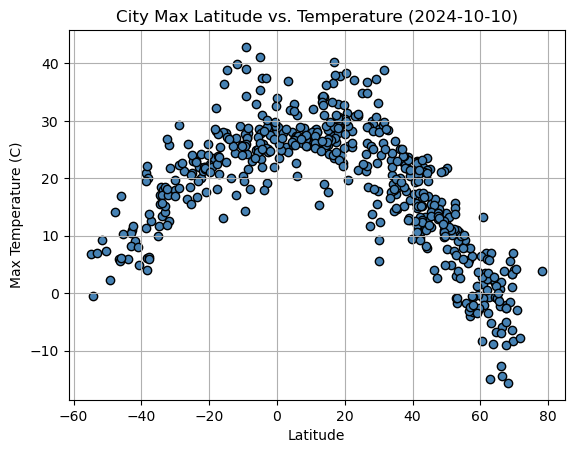

In [4]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], c='steelblue',alpha=1.0, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2024-10-10)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

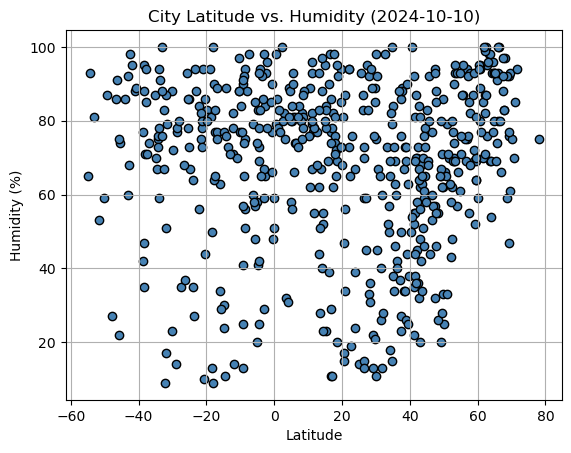

In [5]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='steelblue', edgecolor='black', alpha=1.0)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2024-10-10)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

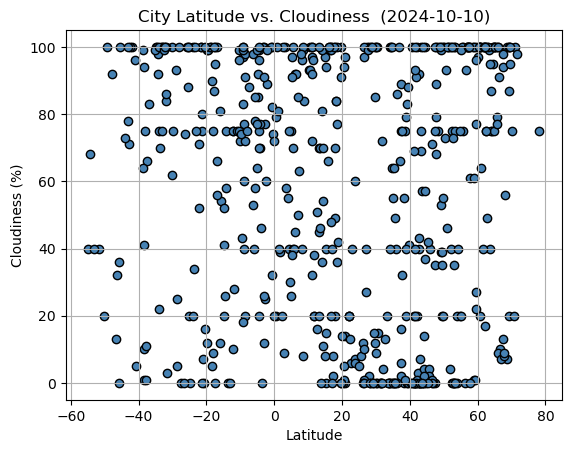

In [6]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='steelblue', edgecolor='black', alpha=1.0)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness  (2024-10-10)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

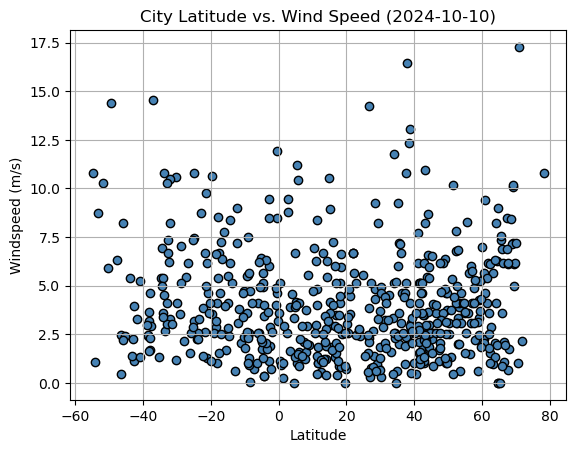

In [7]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='steelblue', edgecolor='black', alpha=1.0)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2024-10-10)')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, xlabel, ylabel, title, eq_position=(0, 0)):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    plt.scatter(x_values, y_values, label='Data Points')
    plt.plot(x_values, regress_values, "r-", label='Regression Line')
    plt.annotate(line_eq, eq_position, fontsize=15, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    r_squared = rvalue ** 2
    print(f"The r^2-value is: {r_squared}")
    plt.show()

In [11]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>0)]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                    
0          libreville   0.3925    9.4537     29.01        79          20   
1             la cruz  23.9167 -106.9000     30.92        67          60   
2            tazovsky  67.4667   78.7000     -2.11        88          94   
3        uusikaupunki  60.8004   21.4084     13.20        94         100   
4          novodvinsk  64.4165   40.8122      1.86        96         100   

         Wind Speed Country        Date  
City_ID                                  
0              5.14      GA  1728577943  
1              2.40      MX  1728577945  
2              8.48      RU  1728577901  
3              9.42      FI  1728577947  
4              6.25      RU  1728577948

In [12]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']<0)]

# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                      
6               pacocha -17.5833  -71.3333     18.08        77         100   
8        puerto natales -51.7236  -72.4875      9.25        53          40   
11           mossel bay -34.1831   22.1460     16.96        75          99   
14            adamstown -25.0660 -130.1015     20.86        86         100   
16               noumea -22.2763  166.4572     20.11        84          52   

         Wind Speed Country        Date  
City_ID                                  
6              6.69      PE  1728577950  
8             10.29      CL  1728577871  
11             3.60      ZA  1728577956  
14             7.45      PN  1728577959  
16             3.87      NC  1728577961

###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.746333689381007


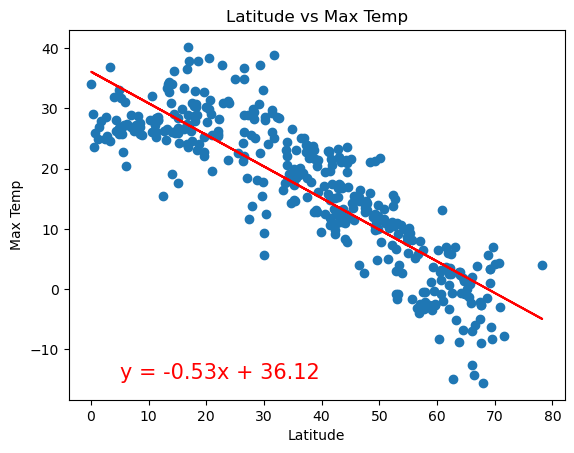

In [55]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
linear_regression_plot(x_values, y_values, xlabel='Latitude', ylabel='Max Temp', title='Latitude vs Max Temp', eq_position=(5, -15))

The r^2-value is: 0.6096016235533818


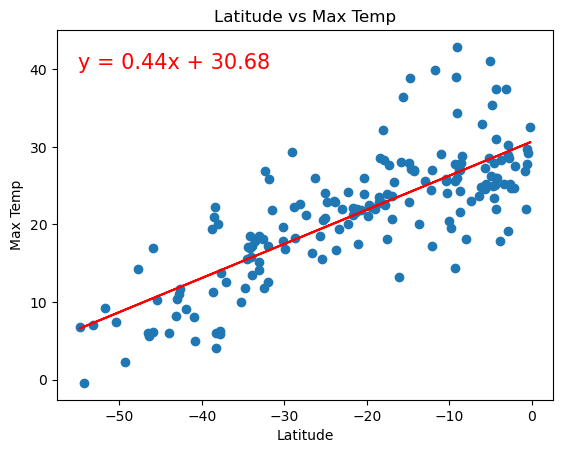

In [58]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
linear_regression_plot(x_values, y_values, xlabel='Latitude', ylabel='Max Temp', title='Latitude vs Max Temp', eq_position=(-55, 40))

**Discussion about the linear relationship:** For both northern and southern hemispheres the tempuratures become a lot warmer as latitude decreases.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.01311982238112683


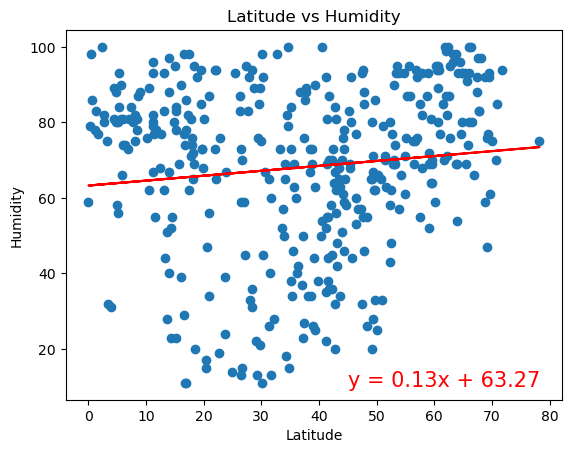

In [68]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
linear_regression_plot(x_values, y_values, xlabel='Latitude', ylabel='Humidity', title='Latitude vs Humidity', eq_position=(45, 10))

The r^2-value is: 0.0027135886248801627


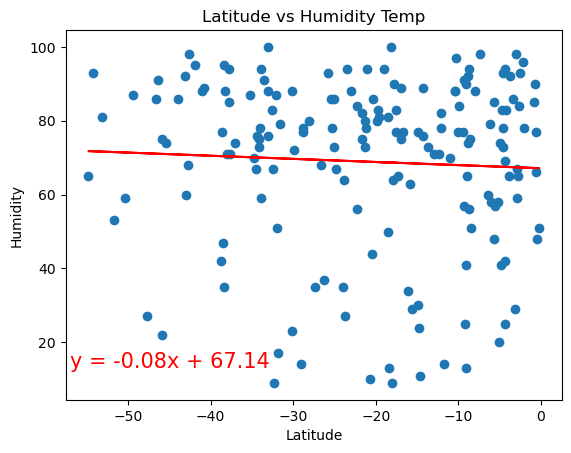

In [77]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
linear_regression_plot(x_values, y_values, xlabel='Latitude', ylabel='Humidity', title='Latitude vs Humidity Temp', eq_position=(-57, 13))

**Discussion about the linear relationship:** For both northern and southern hemispheres the humidity rises slightly as latitude increases.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.010863697046033663


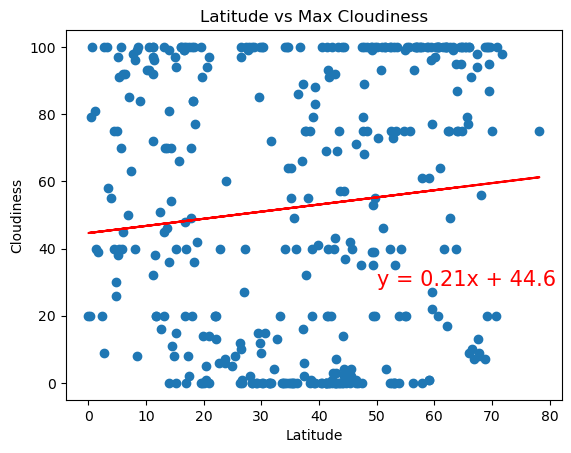

In [85]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
linear_regression_plot(x_values, y_values, xlabel='Latitude', ylabel='Cloudiness', title='Latitude vs Max Cloudiness', eq_position=(50, 29))

The r^2-value is: 0.004239223687799685


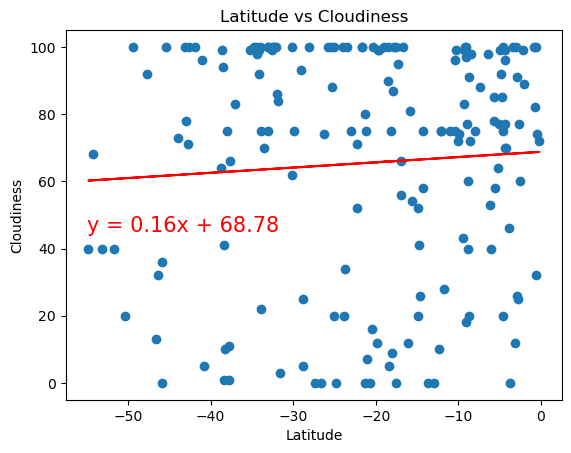

In [94]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
linear_regression_plot(x_values, y_values, xlabel='Latitude', ylabel='Cloudiness', title='Latitude vs Cloudiness', eq_position=(-55, 45))

**Discussion about the linear relationship:** In the northern hemisphere the cloudiness increses slightly as latitude increases. The southern hemisphere cloudiness slightly decreases as latitude increases.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.022559447987619274


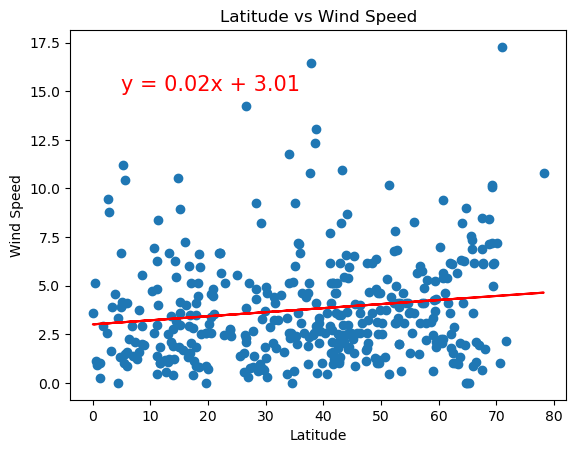

In [95]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
linear_regression_plot(x_values, y_values, xlabel='Latitude', ylabel='Wind Speed', title='Latitude vs Wind Speed', eq_position=(5, 15))

The r^2-value is: 0.025544150500451925


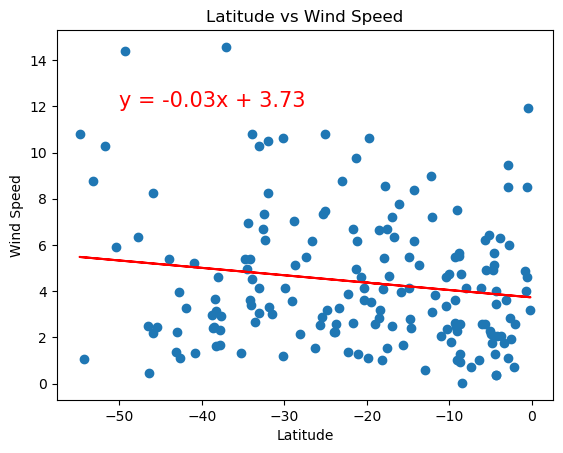

In [97]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
linear_regression_plot(x_values, y_values, xlabel='Latitude', ylabel='Wind Speed', title='Latitude vs Wind Speed', eq_position=(-50, 12))

**Discussion about the linear relationship:** In both the northern and southern hemispheres the windspeed increases as the latitude increases.